### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  
You can work on any.  

Requirements:- 

- You should have completed Linear Regression Section 
- You should hvae completed the Support Vector Machine Section  

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational

In [2]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [3]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2021-01-01", "2022-01-01", auto_adjust=True) 
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,132.533066,132.622397,125.823032,128.453445,143301900
2021-01-05,127.937301,130.766241,127.480694,130.041626,97664900
2021-01-06,126.775939,130.081327,125.445840,125.664215,155088000
2021-01-07,127.411196,130.657029,126.914892,129.952271,109578200
2021-01-08,131.451110,131.649643,129.267374,131.073929,105158200


In [4]:
data.shape 

(252, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-01-04 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    252 non-null    float64
 1   High    252 non-null    float64
 2   Low     252 non-null    float64
 3   Close   252 non-null    float64
 4   Volume  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,140.305948,141.786111,138.924140,140.433300,9.051701e+07
std,14.655287,14.918699,14.608984,14.822319,2.919977e+07
min,118.326724,119.688628,115.523378,115.672493,4.100000e+07
25%,127.823131,129.664335,126.495048,128.009243,6.897910e+07
50%,140.166826,141.837030,138.361533,140.867500,8.563055e+07
75%,148.433212,149.347881,147.318451,148.493031,1.067201e+08
max,180.889532,181.898256,178.302832,180.100540,1.954327e+08


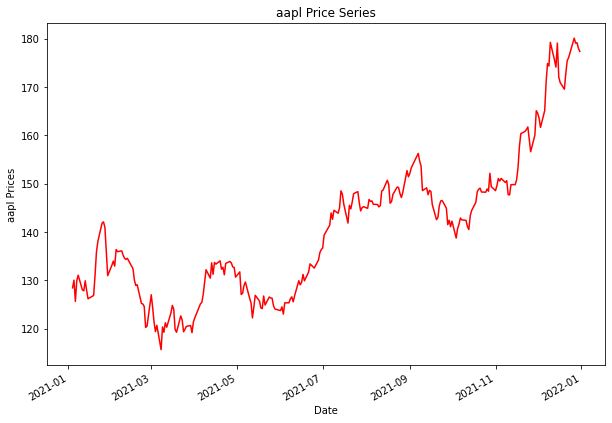

In [7]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

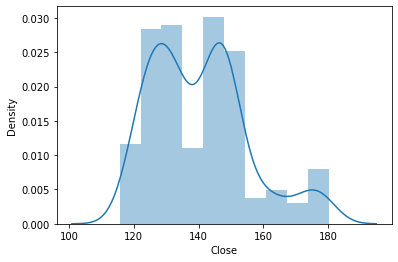

In [8]:
sns.distplot(data["Close"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

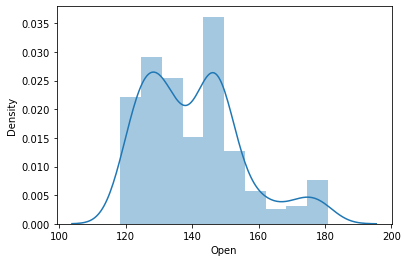

In [9]:
sns.distplot(data["Open"])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

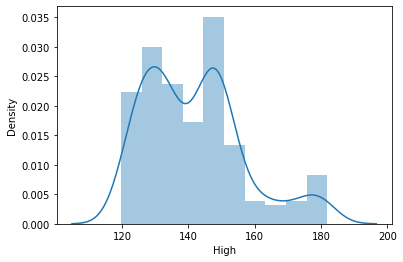

In [10]:
sns.distplot(data["High"])

In [12]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(8, 4)
(2, 4)
(8,)
(2,)


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [14]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  1.0523983196260585
RMSE:-  1.0258646692551892
R2_score:-  0.19932122541279285


In [15]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [16]:
calculate_metrics(y_test, la_p)

MSE:-  2.088975094334018
RMSE:-  1.4453287149759455
R2_score:-  -0.5893203053278058


In [17]:
calculate_metrics(y_test, ri_p)

MSE:-  1.3533717811117942
RMSE:-  1.1633450825579632
R2_score:-  -0.029663425960743783


In [18]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.051 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.049 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=1, kernel=rbf;, score=-13003.480 total time=   0.0s
[CV 4/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.051 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.049 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.1, kernel=rbf;, score=-13003.480 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.051 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.f

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [19]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [20]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")